In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### K-Near Neighbors: (supervised classification prob)
dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black.
'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]
(1797,)
[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', '

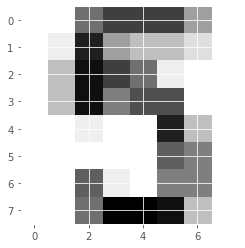

In [54]:
from sklearn import datasets
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.data[:1])
print(digits.target.shape)
print(digits.target_names)
print(digits.feature_names)

print(digits.images[0])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [42]:
type(digits) #Bunch is similar to dict conatining key-value pairs

sklearn.utils.Bunch

In [57]:
X= digits.data
y= digits.target
df= pd.DataFrame(X, columns= digits.feature_names)
df.head()
# df.shape

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [36]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# split is done to evaluate performace(accuracy) which can only be done only new data and can b checked by 
# comparing correct no. of predictions/total no. of datapoints

# Setting the seed with the same argument later will allow you to reproduce the exact split and your downstream results.

# I labels to be distributed in train and test sets as they are in the original dataset so stratify=y.

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test)) #accuracy

0.9833333333333333


#### INSIGHT: k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy

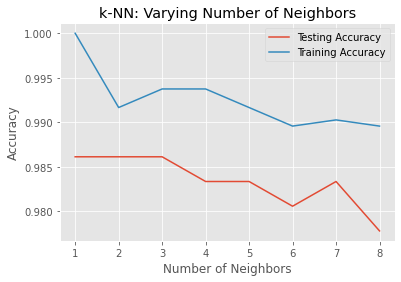

In [37]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#### INSIGHT: test accuracy is highest when using 3,4, 5 and 7 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. 
As K increases, the decision boundary gets smoother and less curvy.Thus, we consider it to be a less complex model than those with a lower K. Generally, complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data - overfitting. If you increase K even more and make the model even simpler, then the model will perform less well on both test and training sets- underfitting

how choose n_neighbors?
model performance?

### REGRESSION: 

In [64]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('D:\CSV\gapminder.csv')
print(df.head())

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  
Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

0.6192442167740035


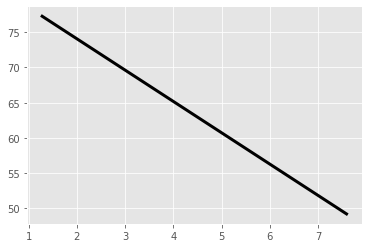

In [76]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

X_fertility=X_reshaped
# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [78]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


In [80]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_reshaped, y_reshaped, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso= Lasso(alpha=0.4, normalize=True)
# Fit the regressor to the data
lasso.fit(X_reshaped, y_reshaped)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
df_columns= np.array(df.columns)
print(df_columns)
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

lasso? why? what coeff means? alpha? rmse? r^2? what does tht mean? what does tht signify? no. of folds?why logspace, linspace?

The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem.

In [59]:
df= pd.read_csv('D:\CSV\diabetes.csv')
df.head()
X=df.drop('diabetes', axis=1)
y=df['diabetes']

In [60]:
# Import necessary modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

# Create training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42, test_size=0.4) 

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



 A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. what is all these terms, meanning , application?

Logistic Regression for classification prob???????????/

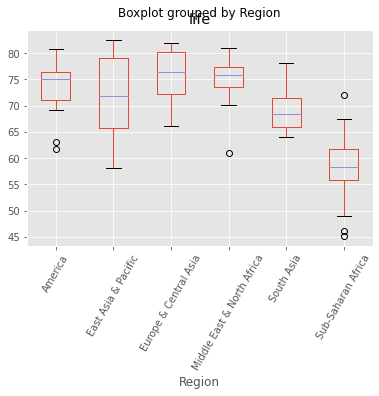

In [86]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('D:\CSV\gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


 #### INSIGHT: Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia.  now use region to predict life expectancy

In [87]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True) #'Region_America' was dropped

# Print the new columns of df_region
print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [90]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [92]:
# X is all columns except life including 5 region columns and y is life column
X= df_region.drop('life', axis=1)
y=df_region.life

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection  import cross_val_score 

# Instantiate a ridge regressor: ridge
ridge = Ridge(normalize=True, alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


In [95]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC  #SVC stands for Support Vector Classification, which is a type of SVM(Support Vector Machine).

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent') # default axis is column 

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [ ]:
sample.housing.map(dict(yes=1, no=0))


In [ ]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='most_frequent')),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test , y_pred))


In [99]:
X


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,13.0,0,0,0,0,0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,49.2,0,1,0,0,0
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,26.2,1,0,0,0,0
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,94.9,0,0,0,0,1
